# Lab2 - Concrete compressive strength regression
Author: *RYAN BAKER*

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## 0. Function definitions

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances. 

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`.

In [37]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms).
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    #According to the docstring, the parameter X is the feature matrix and y is the target vector, therefore train_test_split() is required inside this function. 
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error', return_train_score=True)
    return (scores['train_score'].mean(), scores['test_score'].mean())

## 1. Load data
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Print the README of the concrete Dataset object. Load the Dataset object by using `return_dataset=True`.


In [38]:
#TODO: load the yellowbrick concrete Dataset object and access the README
from yellowbrick.datasets import load_concrete

data = load_concrete(return_dataset=True)

data.README

'# Concrete Compressive Strength\n\n**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**\n\n- Multivariate Data Set\n- Real Attributes\n- 1,030 Instances\n- 9 attributes\n- Well suited for _regression_ tasks\n- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)\n\n## Abstract\n\nConcrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.\n\n## Description\n\nGiven are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.\n\n## Attributes\n\n- cement (kg)\n- blast furnace slag (kg)\n- fly ash (kg)\n- water (kg)\n- superplasticizer (kg)\n- coarse aggregate (kg)\n- fine aggregate (kg)\n- age (day)\n- compre

### *Question 1:* What is the target variable name and units in this dataset?

*compressive strength (MPa)*


### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`.

Print dimensions and type of `X`, `y`.

In [39]:
#TODO: Load feature matrix X and target vector y, print shapes
X, y = load_concrete()
print(X.shape)
print(y.shape)



(1030, 8)
(1030,)


## 2. Inspect the data 

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features.

Print the minimum and maximum of each feature in `X`.

In [40]:
# TODO: print range (minimum and maximum) of features
for column in X.columns:
    print(f'{column}: Min: {X[column].min()} Max: {X[column].max()}')

cement: Min: 102.0 Max: 540.0
slag: Min: 0.0 Max: 359.4
ash: Min: 0.0 Max: 200.1
water: Min: 121.75 Max: 247.0
splast: Min: 0.0 Max: 32.2
coarse: Min: 801.0 Max: 1145.0
fine: Min: 594.0 Max: 992.6
age: Min: 1 Max: 365


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges.

Add y-axis label indicating units, and a title.

Text(0, 0.5, 'Values')

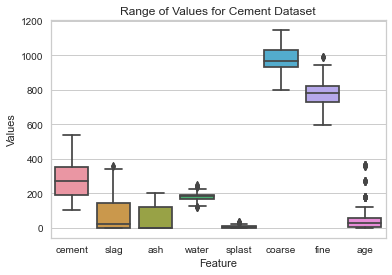

In [41]:
#TODO: add boxplot of features
bp = sns.boxplot(data=X)
bp.set_title("Range of Values for Cement Dataset")
bp.set_xlabel("Feature")
bp.set_ylabel("Values")

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

Text(0.5, 1.0, 'Cross Correlation Heatmap')

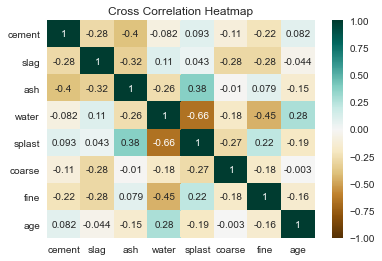

In [42]:
# TODO: add pairwise cross-correlation heatmap of features
hm = sns.heatmap(data=X.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm.set_title("Cross Correlation Heatmap")

### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

Text(0.5, 0.98, 'Number of Samples of Each Target Value')

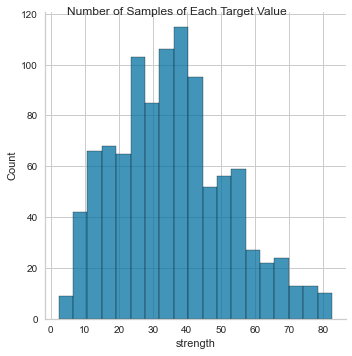

In [43]:
#TODO: Add histogram of targect vector
hist = sns.displot(data=y)
hist.fig.suptitle("Number of Samples of Each Target Value")

## 3. Create training and test sets

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets.

In [44]:
# TODO: train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list, compute the negative root mean-squared error using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [45]:
#TODO: Calling get_regressor_neg_rms() for each model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = [LinearRegression(), RandomForestRegressor(random_state=64), GradientBoostingRegressor(random_state=79)]

for model in models:
    scores = get_regressor_neg_rms(model, X, y, cv=7)
    print(f'Model: {model}, Training Score: {scores[0]:0.2f}, Validation Score: {scores[1]:0.2f}')


Model: LinearRegression(), Training Score: -105.89, Validation Score: -108.23
Model: RandomForestRegressor(random_state=64), Training Score: -4.50, Validation Score: -25.19
Model: GradientBoostingRegressor(random_state=79), Training Score: -13.63, Validation Score: -25.02


### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why.

*LinearRegression() training score and validation score are very close; it is hard to say if this is underfitting or if the validation score is maximized. RandomForestRegressor() and GradientBoostingRegressor() are likely underfitting, because the magnitudes of the validation scores are higher than the magnitudes of the training scores. This implies that the test data is performing worse than the training data, so the model has high bias.*  



## 5. Find a better model

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[50, 100, 150]`.

Use nested for-loops to iterate these two lists, compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [46]:
#TODO: Calling get_regressor_neg_rms() for each parameter pair
depths = [10, 15, 20]
estimators = [50, 100, 150]
for depth in depths:
    for n in estimators:
        scores = get_regressor_neg_rms(RandomForestRegressor(random_state=64, max_depth=depth, n_estimators=n), X, y, cv=7)
        print(f'max_depth: {depth}, n_estimators: {n}, Training Score: {scores[0]:0.2f}, Validation Score: {scores[1]:0.2f}')


max_depth: 10, n_estimators: 50, Training Score: -6.17, Validation Score: -26.92
max_depth: 10, n_estimators: 100, Training Score: -5.96, Validation Score: -26.44
max_depth: 10, n_estimators: 150, Training Score: -5.85, Validation Score: -26.13
max_depth: 15, n_estimators: 50, Training Score: -4.71, Validation Score: -25.71
max_depth: 15, n_estimators: 100, Training Score: -4.52, Validation Score: -25.19
max_depth: 15, n_estimators: 150, Training Score: -4.43, Validation Score: -24.87
max_depth: 20, n_estimators: 50, Training Score: -4.70, Validation Score: -25.74
max_depth: 20, n_estimators: 100, Training Score: -4.50, Validation Score: -25.21
max_depth: 20, n_estimators: 150, Training Score: -4.41, Validation Score: -24.82


### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report this score here.

*All scores were very close, but the combination of max_depth=20 and n_estimators=150 produced the best validation score with a magnitude of 24.82.*



## 6. Retrain best model

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [47]:
#TODO: retrain the best estimator
rfr = RandomForestRegressor(random_state=64, max_depth=20, n_estimators=150)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)


## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and R-squared

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [48]:
# TODO: print rms and r-squared for training and test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(f'Train MSE: {mean_squared_error(y_train, y_pred_train):0.2f}')
print(f'Train R2: {r2_score(y_train, y_pred_train):0.3f}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred):0.2f}')
print(f'Test R2: {r2_score(y_test, y_pred):0.3f}')




Train MSE: 4.01
Train R2: 0.986
Test MSE: 23.71
Test R2: 0.913


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models?

* The lab's random forest regressor algorithm was reported to be [*RMSE=4.01 MPa, R2=0.986*] for training, and [*RMSE=23.71 MPa, R2=0.913*] for testing.
* The lab's algorithm had a [*RMSE var = 0.05 MPa worse, R2 var = 0.096 better*] difference for training and a [*RMSE var = 14.89 MPa worse, R2 var = 0.122 better*] difference for testing data when compared with the article's regression training ([*RMSE=3.96 MPa, R2=0.89*] training, [*RMSE=8.82 MPa, R2=0.791] testing*). 
* The lab's algorithm did [*RMSE var = 1.00 MPa worse, R2 var = 0.046 better*] for training and [*RMSE var = 19.39 MPa worse, R2 var = 0.016 worse*] for testing in comparison with the article's neural network testing ([*RMSE=3.01 MPa, R2=0.94*]  training, and [*RMSE=4.32 MPa, R2=0.929*] testing). 
* In general, a lower RMSE values and R2 values closer to 1 are desirable.* 



### 7.2 Predicted vs actual strength plot
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


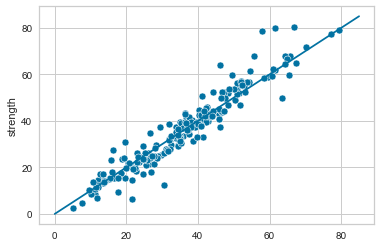

In [58]:
#TODO: predicted-actual plot

splot = sns.scatterplot(x=y_pred, y=y_test)
splot.plot([0,85], [0,85])



### 7.3 Residual plot
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



Text(0, 0.5, '(Actual Strength - Predicted Strength)')

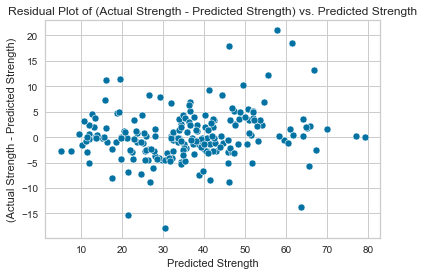

In [64]:
# TODO: Residual plot
splot2 = sns.scatterplot(x=y_pred, y=(y_test-y_pred))
splot2.set_title("Residual Plot of (Actual Strength - Predicted Strength) vs. Predicted Strength")
splot2.set_xlabel("Predicted Strength")
splot2.set_ylabel("(Actual Strength - Predicted Strength)")

## 8. Conclusion

In conclusion, comment on the following items:
- Did we find a model that outperformes the polynomial regression reported in the reference article? Explain.
- Did we find a model that outperformes the neural network reported in the reference article? Explain.
- What was the assumption about the dataset and the reference article? How does this affect your conclusions?


* *The model in the lab performed worse for training scores and testing scores (RMSE) than the polynomial regression model reported in the article. The lab's model did achieve better R2 scores however, which may indicate that the lab model is too complex.*
* *The model in the lab performed worse for training and testing scores (RMSE) than the neural network model reported in the article. The lab's model did achieve a slightly better R2 training score but a worse R2 testing score. This may indicate that the lab's model is not complex enough.*
* *The assumption about the dataset is that there is not a perfect correlation or model to fit this real world data. In conclusion, the lab model may be more useful in certain scenarios than the reported polynomial regression or neural network models from the article, and there may be other scenarios where each of the reported models are better suited to the task.*


## 9. Reflection



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

- *I enjoyed learning more about scikit learn in general, working with dataframes, and how each part of the lab used data visualization to help bring understanding to what was being done.*
- *I disliked trying to get the line of best fit on the seabord scatterplot, for some reason it was a struggle. Luckily, the office hours provided were able to get me by with Farid's help! Thank you again Farid!*

# Appendix: Optional - use grid search to find the best model parameters.

## Workflow overview

In [ ]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## A-1. Hyperparameter tuning using grid search 

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [ 11, 13, 15, 17]`
- `'max_features': ['auto', 'log2', None]`


In [ ]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### A-5.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [ ]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### *Question A-1:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*


## A-2. Retrain best model

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [ ]:
#TODO: retrain the best estimator



## A-3. Model evaluation and conclusion

Repeat steps in Section 7 above for the best model.

Revisit your conclusion.